---
---
# Loading Dataset & Modules

Modules

In [2]:
import pandas as pd
import numpy as np  

Loading Data

In [3]:
xls = pd.ExcelFile('Healthcare_dataset.xlsx')
df1 = pd.read_excel(xls, 'Feature Description')
df2 = pd.read_excel(xls, 'Dataset')

Dataset Sheet 1/2

In [4]:
df1

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


Dataset Sheet 2/2

In [5]:
df2.head(2)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


--- 
---
# Problem Understanding

Aim: 
* Understanding Persistency of the drug by using physician prescriptions.
* Automate this process of identification. 

Methodology:
* Gather insights from factors 
* Use ML techniques to classify the dataset

---
---
# Preprocess Part 0
## `Data Understanding`
### `Management of Data` 


## Organizing Data
`Dataset`, df2, consists of 69 columns which have 6 main parts according to `Feature Description`,df1. 

ID, Target, Demographics, Provider, Clinical, Disease

---
Unique Row Id

In [6]:
# Patient ID
p_df = df2.iloc[:,0]    

In [7]:
ID = pd.concat([p_df], axis = 1 ) 
ID.head() 

,Ptid
0,P1
1,P2
2,P3
3,P4
4,P5


---
### Target Variable


In [8]:
# Target 
t_df = df2.iloc[:,1]  

In [9]:
Target = pd.concat([t_df], axis = 1 ) 
Target.head() 

,Persistency_Flag
0,Persistent
1,Non-Persistent
2,Non-Persistent
3,Non-Persistent
4,Non-Persistent


---
### Demographics

In [10]:
# Demographics
d_df = df2.loc[:, ['Age_Bucket', 'Race', 'Region', 'Gender', 'Ethnicity', 'Idn_Indicator' ] ]  

In [11]:
Demographics = pd.concat([d_df], axis = 1 ) 
Demographics.head() 

,Age_Bucket,Race,Region,Gender,Ethnicity,Idn_Indicator
0,>75,Caucasian,West,Male,Not Hispanic,N
1,55-65,Asian,West,Male,Not Hispanic,N
2,65-75,Other/Unknown,Midwest,Female,Hispanic,N
3,>75,Caucasian,Midwest,Female,Not Hispanic,N
4,>75,Caucasian,Midwest,Female,Not Hispanic,N


---
### Provider Attributes

In [12]:
# Provider Attributes
p_df = df2.loc[:,[
     'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket' ] ]  

In [13]:
Provider = p_df 
Provider.head()  

,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket
0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
1,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
2,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
3,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
4,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown


---
### Clinical Factors
`!!!` 
* `# NTM - Multiple Risk Factors` is investigated under Disease/Treatment Factors. 
* `NTM - Dexa Scan Recency` cannot be found in the raw data. 

In [14]:
# NTM - T-Score 
ntm_t = df2.loc[:,[
    'Tscore_Bucket_Prior_Ntm','Tscore_Bucket_During_Rx'] ]  

# Change in T Score 
ct = df2.loc[:,[
    'Change_T_Score'] ] 

# NTM - Risk Segment
ntm_r = df2.loc[:,[
'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx' ] ]

# Change in Risk Segment
c_r = df2.loc[:,[
'Change_Risk_Segment' ] ] 

# NTM - Multiple Risk Factors


# NTM - Dexa Scan Frequency
ntm_d_f = df2.loc[:,[
'Dexa_Freq_During_Rx' ] ] 

# NTM - Dexa Scan Recency


# Dexa During Therapy
d_d = df2.loc[:,[
    'Dexa_During_Rx' ] ] 

# NTM - Fragility Fracture Recency
ntm_f = df2.loc[:,[
'Frag_Frac_Prior_Ntm'] ]  

# Fragility Fracture During Therapy
f_f = df2.loc[:,[
'Frag_Frac_During_Rx'] ]  

# NTM - Glucocorticoid Recency
ntm_glu = df2.loc[:,[
       'Gluco_Record_Prior_Ntm'] ] 
       
# Glucocorticoid Usage During Therapy
glu = df2.loc[:,[
'Gluco_Record_During_Rx'] ]  

In [15]:
Clinical = pd.concat( [ntm_t,ct,ntm_r, c_r,ntm_d_f ,d_d,ntm_f,f_f, ntm_glu, glu], axis = 1 ) 
Clinical.head() 

,Tscore_Bucket_Prior_Ntm,Tscore_Bucket_During_Rx,Change_T_Score,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx,Change_Risk_Segment,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx
0,>-2.5,<=-2.5,No change,VLR_LR,VLR_LR,Unknown,0,N,N,N,N,N
1,>-2.5,Unknown,Unknown,VLR_LR,Unknown,Unknown,0,N,N,N,N,N
2,<=-2.5,<=-2.5,No change,HR_VHR,HR_VHR,No change,0,N,N,N,N,N
3,>-2.5,<=-2.5,No change,HR_VHR,HR_VHR,No change,0,N,N,N,N,Y
4,<=-2.5,Unknown,Unknown,HR_VHR,Unknown,Unknown,0,N,N,N,Y,Y


---
### Disease/Treatment Factor

In [16]:
# NTM - Injectable Experience 
ntm_i = df2.loc[:,[
    'Injectable_Experience_During_Rx'] ] 

# Risk Factors 
r_f = df2.loc[:,[ 
       #'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx','Change_Risk_Segment',
       
       'Risk_Type_1_Insulin_Dependent_Diabetes',
       'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
       'Risk_Untreated_Chronic_Hyperthyroidism',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis',
       'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
       'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness',
       'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency',
       'Risk_Immobilization', 'Risk_Recurring_Falls', 'Count_Of_Risks'] ] 
       
# NTM - Comorbidity  
ntm_com = df2.loc[:,[ 
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease'  ] ] 

# NTM - Concomitancy
ntm_con = df2.loc[:,[ 
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines' ]  ]  

# Adherence 
ad = df2.loc[:,[ 
       'Adherent_Flag'] ]  

In [17]:
Disease = pd.concat( [ ntm_i,r_f ,ntm_com,ntm_con, ad ], axis =1 )
Disease.head() 

,Injectable_Experience_During_Rx,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,...,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Adherent_Flag
0,Y,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Adherent
1,Y,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Adherent
2,Y,N,N,N,N,N,N,Y,N,N,...,N,N,N,N,N,N,N,N,N,Adherent
3,Y,N,N,N,N,N,N,N,Y,N,...,Y,Y,N,N,N,N,N,N,Y,Adherent
4,Y,N,N,N,N,N,N,N,Y,N,...,Y,Y,Y,N,N,N,N,N,N,Adherent


---
# Preprocess Part 0 Result
## Organized Data

`! Important Notes` 
* `# NTM - Multiple Risk Factors` is investigated under Disease/Treatment Factors. 
* `NTM - Dexa Scan Recency` cannot be found in the raw data.  

In [18]:
df = pd.concat( [ID, Target, Demographics, Provider, Clinical, Disease],axis=1 )  
df.head() 

,Ptid,Persistency_Flag,Age_Bucket,Race,Region,Gender,Ethnicity,Idn_Indicator,Ntm_Speciality,Ntm_Specialist_Flag,...,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Adherent_Flag
0,P1,Persistent,>75,Caucasian,West,Male,Not Hispanic,N,GENERAL PRACTITIONER,Others,...,N,N,N,N,N,N,N,N,N,Adherent
1,P2,Non-Persistent,55-65,Asian,West,Male,Not Hispanic,N,GENERAL PRACTITIONER,Others,...,N,N,N,N,N,N,N,N,N,Adherent
2,P3,Non-Persistent,65-75,Other/Unknown,Midwest,Female,Hispanic,N,GENERAL PRACTITIONER,Others,...,N,N,N,N,N,N,N,N,N,Adherent
3,P4,Non-Persistent,>75,Caucasian,Midwest,Female,Not Hispanic,N,GENERAL PRACTITIONER,Others,...,Y,Y,N,N,N,N,N,N,Y,Adherent
4,P5,Non-Persistent,>75,Caucasian,Midwest,Female,Not Hispanic,N,GENERAL PRACTITIONER,Others,...,Y,Y,Y,N,N,N,N,N,N,Adherent


---
---
# Preprocess Part 1
## `Data Cleaning and Feature engineering`
### `Unique & Missing Values`


---
## Preprocessing 1.0

Modules

Necessary Functions

Modules

In [19]:
from collections import defaultdict

from collections import Counter 

Taking out Unique Variables

In [20]:
def uvc(data):
    temp = defaultdict() 
    for i in data:
        temp[i] = pd.unique(data[i])
    return temp 

Creating Dataframe for Unique & NaN Values

In [21]:
def un(data, conf = 1):
    temp = data 
    u_temp = [] # Unique Values 
    n_temp = [] # Nan Values 

    for i in temp.columns:
        u_temp.append( len( pd.unique(temp[i])) ) 
        if conf == 0:
            n_temp.append( temp[i].isna().sum() ) 
        else:
            try:
                n_temp.append( dict(Counter(temp[i]))['NaN']  )
            except:
                n_temp.append(0)

    un_temp = pd.DataFrame(list(zip(u_temp, n_temp)),
                columns =['Unique Values', 'Nan Values'])
    un_temp = un_temp.T
    un_temp.columns = temp.columns

    # Sums
    sum_temp = [un_temp.loc['Unique Values'].sum() , un_temp.loc['Nan Values'].sum()] 
    s_temp = pd.DataFrame(sum_temp, columns=['Sum'], index= un_temp.index ) 

    # Sums without ID
    sum_temp = [un_temp.loc['Unique Values'].sum() , un_temp.loc['Nan Values'].sum()] 
    s_temp = pd.DataFrame(sum_temp, columns=['Sum'], index= un_temp.index ) 
    
    un_temp = pd.concat( [s_temp, un_temp] ,axis=1) 
    return  un_temp


Extracting Meaningful Values & Converting Binary(Meaningful & NaN)

In [22]:
def ext(data):
    cv = [] 
    for i in list(uvc(data).items()):
        for j in list(i)[1]: 
            if j not in nv:
                cv.append(j) 
    
    data = data.replace(cv,'M') 
    data = data.replace(nv,'NaN') 

    return data 


Rare Data Handling

In [23]:
def rare_handling(data,k=5):
    object_cols = data.select_dtypes(include='object').columns[1:] 
    total_size = len(data) 
    k = 5
    to_combine = {}
    percents = {} 
    to_drop = []
    rares = {} 
    percent = 0.05
    for col in object_cols:
        target_percent = pd.Series(data[col].value_counts() / total_size)
        good_enough = np.where(target_percent>percent)[0]
        not_enough = np.where(target_percent<percent)[0]
        # Variables with more than k categories and has rare categories
        if (data[col].unique().size > k) and (not_enough.size > 0):
            to_combine[col] = {"n.e": target_percent[not_enough].index, 'g.e': target_percent[good_enough].index, 'last_g.e': target_percent[good_enough].index[-1]}

        # Variables with exactly k categories and has rare categories
        elif (data[col].unique().size == k) and (not_enough.size > 0):
            to_drop.append(col)  

        data[col] = data[col].replace(list(target_percent[not_enough].index),'Rare') 
        data[col] = data[col].replace(list(target_percent[good_enough].index),'Not rare') 
        percents[col] = target_percent   
        
        if len(target_percent[not_enough].index) >2:
            rares[col] = list(target_percent[not_enough].index)

    percents = pd.DataFrame.from_dict(percents, orient = 'index')
    rares = pd.DataFrame.from_dict(rares, orient = 'index') 
    return [to_combine, to_drop ,percents,rares] 


---
## Preprocessing 1.1

Determining of Missing Values

### `Check Unique Values to find NaN / Missing Values`

In [24]:
uvc(df)  

defaultdict(None,
            {'Ptid': array(['P1', 'P2', 'P3', ..., 'P3422', 'P3423', 'P3424'], dtype=object),
             'Persistency_Flag': array(['Persistent', 'Non-Persistent'], dtype=object),
             'Age_Bucket': array(['>75', '55-65', '65-75', '<55'], dtype=object),
             'Race': array(['Caucasian', 'Asian', 'Other/Unknown', 'African American'],
                   dtype=object),
             'Region': array(['West', 'Midwest', 'South', 'Other/Unknown', 'Northeast'],
                   dtype=object),
             'Gender': array(['Male', 'Female'], dtype=object),
             'Ethnicity': array(['Not Hispanic', 'Hispanic', 'Unknown'], dtype=object),
             'Idn_Indicator': array(['N', 'Y'], dtype=object),
             'Ntm_Speciality': array(['GENERAL PRACTITIONER', 'Unknown', 'ENDOCRINOLOGY', 'RHEUMATOLOGY',
                    'ONCOLOGY', 'PATHOLOGY', 'OBSTETRICS AND GYNECOLOGY',
                    'PSYCHIATRY AND NEUROLOGY', 'ORTHOPEDIC SURGERY',
        

`Define NaN / Missing Values`

In [25]:
nv = ['Other/Unknown', 'Unknown' ]   

---
## Preprocessing 1.2

Investigation of Missing Values

---
### Demographics & Target

* `Persistency_Flag`, 
`Age`, 
`Race`, 
`Region`, 
`Ethnicity`, 
`Gender`, 
`IDN Indicator`, 
`NTM - Physician Specialty`

In [26]:
temp = pd.concat( [Target, Demographics,Provider],axis=1)  

Datafreme of Unique & Missing Values

In [27]:
print('Number of Rows:',len(temp)) 
print('Number of Columns:',len(temp.columns)) 
un(temp) 

Number of Rows: 3424
Number of Columns: 10


,Sum,Persistency_Flag,Age_Bucket,Race,Region,Gender,Ethnicity,Idn_Indicator,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket
Unique Values,63,2,4,4,5,2,3,2,36,2,3
Nan Values,0,0,0,0,0,0,0,0,0,0,0


### Rare Handling

In [28]:
t = temp.copy() 
to_combine, to_drop ,percents, w_drop = rare_handling(data = t , k = 5) 
# w_drop.T 
rare_handling(data = t , k = 4)[2]   
percents.T[list(w_drop.index)].dropna(how='all').T 

,Caucasian,Other/Unknown,African American,Asian,Unknown,GENERAL PRACTITIONER,RHEUMATOLOGY,ENDOCRINOLOGY,ONCOLOGY,OBSTETRICS AND GYNECOLOGY,...,PODIATRY,OCCUPATIONAL MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,PAIN MEDICINE,OPHTHALMOLOGY,HOSPITAL MEDICINE,EMERGENCY MEDICINE,NUCLEAR MEDICINE,CLINICAL NURSE SPECIALIST,RADIOLOGY
Race,0.919393,0.028329,0.027745,0.024533,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ntm_Speciality,NaN,NaN,NaN,NaN,0.090537,0.448306,0.176402,0.133762,0.065713,0.026285,...,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292


In [29]:
final_drop = 'Race' 

In [30]:
combine_these = list( w_drop.drop(final_drop).index) 

for k in combine_these:
    #print(temp[k]) 
    temp[k] = temp[k].replace(list(w_drop.T[k]), 'Rare') 
temp.head()  

,Persistency_Flag,Age_Bucket,Race,Region,Gender,Ethnicity,Idn_Indicator,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket
0,Persistent,>75,Caucasian,West,Male,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
1,Non-Persistent,55-65,Asian,West,Male,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
2,Non-Persistent,65-75,Other/Unknown,Midwest,Female,Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
3,Non-Persistent,>75,Caucasian,Midwest,Female,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown
4,Non-Persistent,>75,Caucasian,Midwest,Female,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown


In [31]:
uvc(temp) 

defaultdict(None,
            {'Persistency_Flag': array(['Persistent', 'Non-Persistent'], dtype=object),
             'Age_Bucket': array(['>75', '55-65', '65-75', '<55'], dtype=object),
             'Race': array(['Caucasian', 'Asian', 'Other/Unknown', 'African American'],
                   dtype=object),
             'Region': array(['West', 'Midwest', 'South', 'Other/Unknown', 'Northeast'],
                   dtype=object),
             'Gender': array(['Male', 'Female'], dtype=object),
             'Ethnicity': array(['Not Hispanic', 'Hispanic', 'Unknown'], dtype=object),
             'Idn_Indicator': array(['N', 'Y'], dtype=object),
             'Ntm_Speciality': array(['GENERAL PRACTITIONER', 'Unknown', 'ENDOCRINOLOGY', 'RHEUMATOLOGY',
                    'ONCOLOGY', 'Rare'], dtype=object),
             'Ntm_Specialist_Flag': array(['Others', 'Specialist'], dtype=object),
             'Ntm_Speciality_Bucket': array(['OB/GYN/Others/PCP/Unknown', 'Endo/Onc/Uro', 'Rheum'], dtype=o

In [32]:
Demographics = temp

In [33]:
print('Number of Rows:',len(Demographics)) 
print('Number of Columns:',len(Demographics.columns)) 
un(Demographics) 

Number of Rows: 3424
Number of Columns: 10


,Sum,Persistency_Flag,Age_Bucket,Race,Region,Gender,Ethnicity,Idn_Indicator,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket
Unique Values,33,2,4,4,5,2,3,2,6,2,3
Nan Values,0,0,0,0,0,0,0,0,0,0,0


---
### Clinical 
`NTM - T-Score `, 
`Change in T Score `, 
`NTM - Risk Segment`,
`Change in Risk Segment`, 
`NTM - Multiple Risk Factors` , 
`NTM - Dexa Scan Frequency`, 
`NTM - Dexa Scan Recency` , 
`Dexa During Therapy` , 
`NTM - Fragility Fracture Recency`, 
`Fragility Fracture During Therapy` , 
`NTM - Glucocorticoid Recency` , 
`Glucocorticoid Usage During Therapy` 


In [34]:
temp = Clinical.copy() 

In [35]:
print('Number of Rows:',len(temp)) 
print('Number of Columns:',len(temp.columns)) 
un(temp) 

Number of Rows: 3424
Number of Columns: 12


,Sum,Tscore_Bucket_Prior_Ntm,Tscore_Bucket_During_Rx,Change_T_Score,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx,Change_Risk_Segment,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx
Unique Values,86,2,3,4,2,3,4,58,2,2,2,2,2
Nan Values,0,0,0,0,0,0,0,0,0,0,0,0,0


### Rare Handling

In [36]:
percents = {} 
for col in temp.columns:
        target_percent = pd.Series(temp[col].value_counts() / len(temp)) 
        percents[col] = target_percent   
         
pd.DataFrame.from_dict(percents,orient='index') 

,>-2.5,<=-2.5,Unknown,No change,Worsened,Improved,VLR_LR,HR_VHR,0,5,...,110,108,72,68,69,54,50,66,N,Y
Tscore_Bucket_Prior_Ntm,0.569801,0.430199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tscore_Bucket_During_Rx,0.265771,0.297021,0.437208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change_T_Score,NaN,NaN,0.437208,0.484813,0.050526,0.027453,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk_Segment_During_Rx,NaN,NaN,0.437208,NaN,NaN,NaN,0.280958,0.281834,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change_Risk_Segment,NaN,NaN,0.650993,0.307243,0.035339,0.006425,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk_Segment_Prior_Ntm,NaN,NaN,NaN,NaN,NaN,NaN,0.563960,0.436040,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dexa_Freq_During_Rx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726636,0.033294,...,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,0.000292,NaN,NaN
Dexa_During_Rx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726636,0.273364
Frag_Frac_Prior_Ntm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.838785,0.161215
Frag_Frac_During_Rx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.878213,0.121787


In [37]:
t = temp.copy() 
to_combine, to_drop ,percents, w_drop = rare_handling(data = t , k = 5) 
# w_drop.T  
rare_handling(data = t , k = 5)[2]    
percents.T[list(w_drop.index)].dropna(how='all').T  

""


In [38]:
temp = temp[percents.index] 

In [39]:
uvc(temp) 

defaultdict(None,
            {'Tscore_Bucket_During_Rx': array(['<=-2.5', 'Unknown', '>-2.5'], dtype=object),
             'Change_T_Score': array(['No change', 'Unknown', 'Worsened', 'Improved'], dtype=object),
             'Risk_Segment_During_Rx': array(['VLR_LR', 'Unknown', 'HR_VHR'], dtype=object),
             'Change_Risk_Segment': array(['Unknown', 'No change', 'Worsened', 'Improved'], dtype=object),
             'Risk_Segment_Prior_Ntm': array(['VLR_LR', 'HR_VHR'], dtype=object),
             'Dexa_During_Rx': array(['N', 'Y'], dtype=object),
             'Frag_Frac_Prior_Ntm': array(['N', 'Y'], dtype=object),
             'Frag_Frac_During_Rx': array(['N', 'Y'], dtype=object),
             'Gluco_Record_Prior_Ntm': array(['N', 'Y'], dtype=object),
             'Gluco_Record_During_Rx': array(['N', 'Y'], dtype=object)})

In [40]:
print('Number of Rows:',len(Clinical)) 
print('Number of Columns:',len(Clinical.columns)) 
un(Clinical) 

Number of Rows: 3424
Number of Columns: 12


,Sum,Tscore_Bucket_Prior_Ntm,Tscore_Bucket_During_Rx,Change_T_Score,Risk_Segment_Prior_Ntm,Risk_Segment_During_Rx,Change_Risk_Segment,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx
Unique Values,86,2,3,4,2,3,4,58,2,2,2,2,2
Nan Values,0,0,0,0,0,0,0,0,0,0,0,0,0


---
### Disease/Treatment Factor

* `NTM - Injectable Experience`, `NTM - Comorbidity`, `NTM - Concomitancy`, `NTM - Risk Factors`, `Adherence`


### Rare Handling

In [41]:
temp = pd.concat([ntm_i, r_f ,ad],axis=1) 
temp.head()

,Injectable_Experience_During_Rx,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Adherent_Flag
0,Y,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,0,Adherent
1,Y,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,0,Adherent
2,Y,N,N,N,N,N,N,Y,N,N,...,Y,N,N,N,N,N,N,N,2,Adherent
3,Y,N,N,N,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,N,1,Adherent
4,Y,N,N,N,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,N,1,Adherent


In [42]:
print('Number of Rows:',len(temp)) 
print('Number of Columns:',len(temp.columns)) 
un(temp).T

Number of Rows: 3424
Number of Columns: 22


,Unique Values,Nan Values
Sum,50,0
Injectable_Experience_During_Rx,2,0
Risk_Type_1_Insulin_Dependent_Diabetes,2,0
Risk_Osteogenesis_Imperfecta,2,0
Risk_Rheumatoid_Arthritis,2,0
Risk_Untreated_Chronic_Hyperthyroidism,2,0
Risk_Untreated_Chronic_Hypogonadism,2,0
Risk_Untreated_Early_Menopause,2,0
Risk_Patient_Parent_Fractured_Their_Hip,2,0
Risk_Smoking_Tobacco,2,0


In [43]:
Disease_Treatment_Part1 = temp 

`NTM - Comorbidity `

In [44]:
temp = ntm_com 

In [45]:
print('Number of Rows:',len(temp)) 
print('Number of Columns:',len(temp.columns)) 
un(temp).T

Number of Rows: 3424
Number of Columns: 14


,Unique Values,Nan Values
Sum,28,0
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,2,0
Comorb_Encounter_For_Immunization,2,0
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",2,0
Comorb_Vitamin_D_Deficiency,2,0
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,2,0
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,2,0
Comorb_Long_Term_Current_Drug_Therapy,2,0
Comorb_Dorsalgia,2,0
Comorb_Personal_History_Of_Other_Diseases_And_Conditions,2,0


In [46]:
Disease_Treatment_Part2 = temp 

`NTM - Concomitancy
`

In [47]:
temp = ntm_con

In [48]:
print('Number of Rows:',len(temp)) 
print('Number of Columns:',len(temp.columns)) 
un(temp).T

Number of Rows: 3424
Number of Columns: 10


,Unique Values,Nan Values
Sum,20,0
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,2,0
Concom_Narcotics,2,0
Concom_Systemic_Corticosteroids_Plain,2,0
Concom_Anti_Depressants_And_Mood_Stabilisers,2,0
Concom_Fluoroquinolones,2,0
Concom_Cephalosporins,2,0
Concom_Macrolides_And_Similar_Types,2,0
Concom_Broad_Spectrum_Penicillins,2,0
Concom_Anaesthetics_General,2,0


In [49]:
Disease_Treatment_Part3 = temp 

In [50]:
pdList = [Disease_Treatment_Part1,Disease_Treatment_Part2,Disease_Treatment_Part3] 

Disease_Treatment = pd.concat(pdList,axis=1 )

---
## Preprocessing 1.2.4
Redefiniation of Dataset

In [51]:
pdList = Demographics, Clinical, Disease_Treatment

df = pd.concat(pdList ,axis=1)  


---
## Preprocessing 1.3.0
Extraction of NaN Values

In [52]:
df_view = un(df)

Check in the editor

In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_view.T)

                                                    Unique Values  Nan Values
Sum                                                           217           0
Persistency_Flag                                                2           0
Age_Bucket                                                      4           0
Race                                                            4           0
Region                                                          5           0
Gender                                                          2           0
Ethnicity                                                       3           0
Idn_Indicator                                                   2           0
Ntm_Speciality                                                  6           0
Ntm_Specialist_Flag                                             2           0
Ntm_Speciality_Bucket                                           3           0
Tscore_Bucket_Prior_Ntm                                         

---
## Preprocessing 1.3.1

Drop & Fill Operations

In [54]:
temp = df.copy() 

In [55]:
nv

['Other/Unknown', 'Unknown']

In [56]:
# Drop Values  
will_drop = nv 

# Columns to be ignored for checking 
ignore_col = ['Ntm_Speciality','Change_Risk_Segment', 'Change_T_Score','Tscore_Bucket_During_Rx','Risk_Segment_During_Rx'] 

# Columns to be checked
temp_col = [] 
for i in list(temp.columns):
    if i not in ignore_col:
        temp_col.append(i) 

# Drop rows that contain any value in the list, will_drop
for i in temp_col:
    temp = temp[ temp[i].isin(will_drop) == False ] 


In [57]:
temp_view = un(temp) # un( ext(temp) ).T.head(1+len(temp.columns)) 

In [58]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(temp_view.T)

                                                    Unique Values  Nan Values
Sum                                                           214           0
Persistency_Flag                                                2           0
Age_Bucket                                                      4           0
Race                                                            3           0
Region                                                          4           0
Gender                                                          2           0
Ethnicity                                                       2           0
Idn_Indicator                                                   2           0
Ntm_Speciality                                                  6           0
Ntm_Specialist_Flag                                             2           0
Ntm_Speciality_Bucket                                           3           0
Tscore_Bucket_Prior_Ntm                                         

---
# Preprocess Part 1 Result
NaN & Unique Value Extraction

In [59]:
print('Number of Rows of Raw Data:', len(df)) 
print('Number of Rows of Raw Data:', len(temp)) 
print('Number of Dropped Values:', (len(df) - len(temp)) ) 

Number of Rows of Raw Data: 3424
Number of Rows of Raw Data: 3202
Number of Dropped Values: 222


In [60]:
df = temp 

---
# Visualization 

In [132]:
import seaborn as sns 


In [140]:
df = df.replace({'Persistency_Flag': {'Persistent': 1, 'Non-Persistent': 0}})  

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [141]:
df.head() 

,Persistency_Flag,Age_Bucket,Race,Region,Gender,Ethnicity,Idn_Indicator,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines
0,1,>75,Caucasian,West,Male,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
1,0,55-65,Asian,West,Male,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
3,0,>75,Caucasian,Midwest,Female,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,Y,N,N,N,N,N,N,Y
4,0,>75,Caucasian,Midwest,Female,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,Y,Y,N,N,N,N,N,N
5,0,>75,Caucasian,Midwest,Female,Not Hispanic,N,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,N,N


In [147]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(un(df).T) 

                                                    Unique Values  Nan Values
Sum                                                           214           0
Persistency_Flag                                                2           0
Age_Bucket                                                      4           0
Race                                                            3           0
Region                                                          4           0
Gender                                                          2           0
Ethnicity                                                       2           0
Idn_Indicator                                                   2           0
Ntm_Speciality                                                  6           0
Ntm_Specialist_Flag                                             2           0
Ntm_Speciality_Bucket                                           3           0
Tscore_Bucket_Prior_Ntm                                         

### T Score 

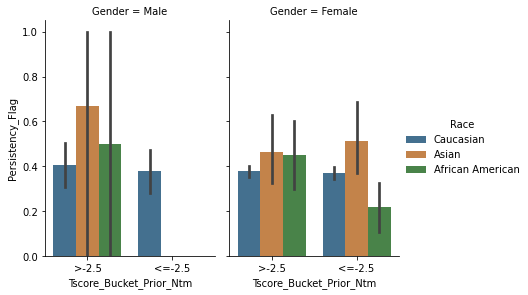

In [158]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Tscore_Bucket_Prior_Ntm", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

In [ ]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Tscore_Bucket_During_Rx", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

### Risk Segment

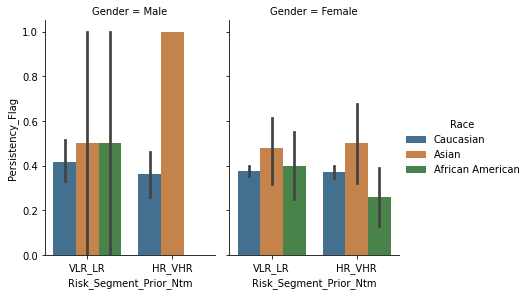

In [157]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Risk_Segment_Prior_Ntm", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

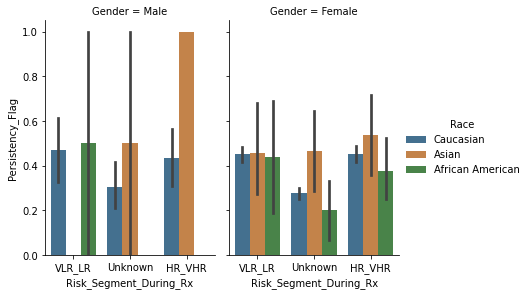

In [155]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Risk_Segment_During_Rx", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

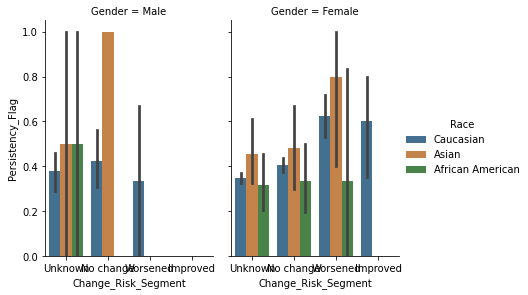

In [159]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Change_Risk_Segment", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

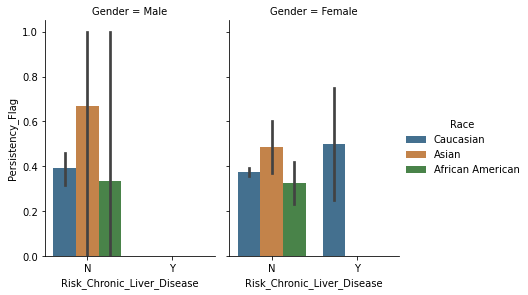

In [161]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Risk_Chronic_Liver_Disease", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

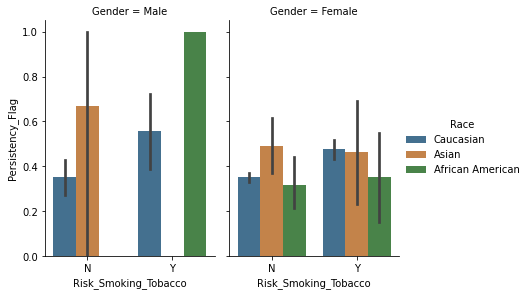

In [152]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Risk_Smoking_Tobacco", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

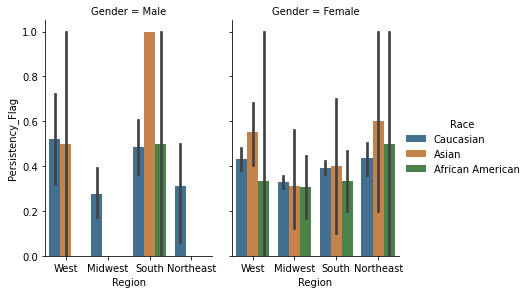

In [162]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Region", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

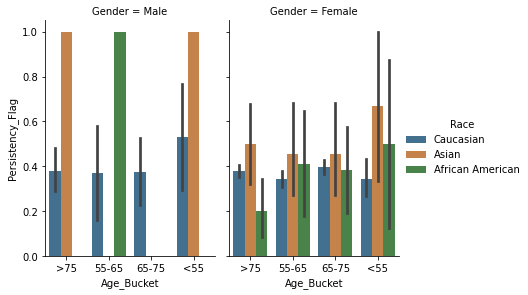

In [154]:
plot_show = 1
if plot_show == 1: 
    sns.catplot(x="Age_Bucket", y="Persistency_Flag",

                    hue="Race", #hue_order = hoc,
                    col="Gender",

                    data=df, kind="bar",

                    height=4, aspect=.7,saturation=.5 )  

---
---
# Model Development And Applications

2.0-) Applied Reduction Techniques
* `A. Multiple Factor Analysis`
* `B. Principal Component Anaylsis`

2.1-) Applied ML Techniques

* `Gradient Boosting Classifier`
* `Random Forest Classifier`
* `Logistic Regression`
* `Accuracy Score`
* `Support Vector Machine`
* `KNeighborsClassifier`
* `MLPClassifier`
* `DecisionTreeClassifier `

## 2.A-) Multiple Factor Analysis

In [61]:
from prince import FAMD 

In [62]:
df['Persistency_Flag']

0           Persistent
1       Non-Persistent
3       Non-Persistent
4       Non-Persistent
5       Non-Persistent
             ...      
3419        Persistent
3420        Persistent
3421        Persistent
3422    Non-Persistent
3423    Non-Persistent
Name: Persistency_Flag, Length: 3202, dtype: object

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (16.38% inertia)', ylabel='Component 1 (14.70% inertia)'>

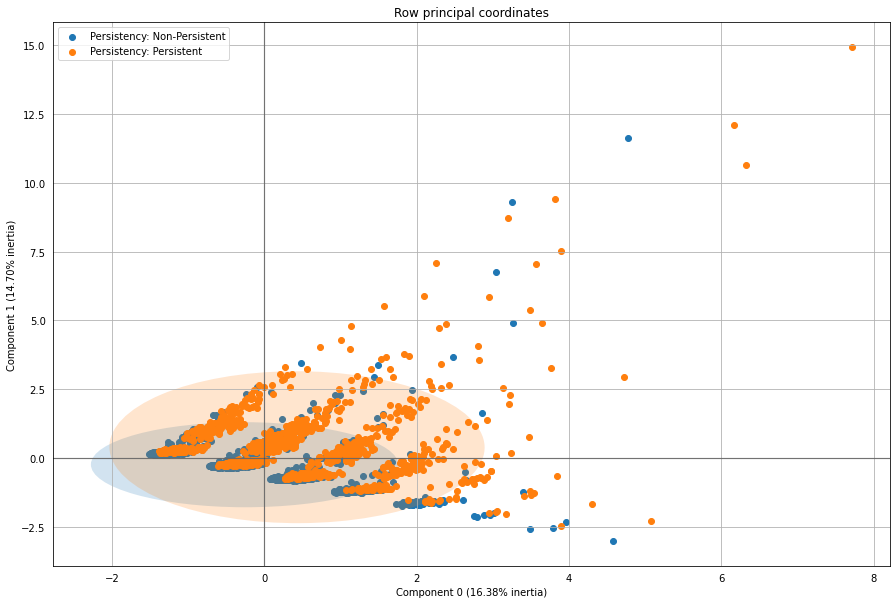

In [63]:
famd = FAMD(n_components =2, n_iter = 8, random_state = 101)

famd.fit(df) 
famd.transform(df) 
famd.plot_row_coordinates(df, figsize=(15, 10),color_labels=['Persistency: {}'.format(t) for t in df['Persistency_Flag']] )

---
## 2.B-) PCA
Note: By implementing One Hot Encoding

### 2.B.0-) PCA

In [64]:
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import OneHotEncoder

In [65]:
un(df)['Sum']['Unique Values']

214

In [66]:
binaries = [] 
for i in un(df):
    if un(df)[i]['Unique Values'] == 2:
        binaries.append(i)


One-Hot Encoding

In [67]:
x = df.iloc[:,1:] #.iloc[:,0:3]
y = OneHotEncoder().fit_transform(x).toarray() 
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

### 2.B.1-) Splitting & Scaling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
X_train, X_test, y_train, y_test  = train_test_split( y, df.iloc[:,0], test_size=2/10, random_state=0) 

scaler = StandardScaler()# Fit on training set only.
scaler.fit(X_train)# Apply transform to both the training set and the test set.

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test) 

PCA

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(.95,n_components=2)

pca.fit(X_train) 

PCA(n_components=0.95)

In [87]:
import matplotlib.pyplot as plt

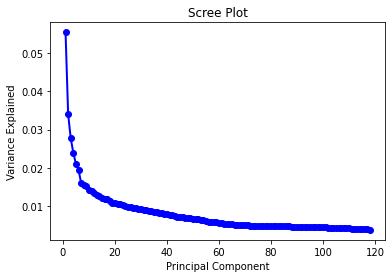

In [88]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [123]:
pca_var = {-1:0}
for i in range(len(pca.explained_variance_ratio_)): 
    pca_var[i] = pca_var[i-1]+ pca.explained_variance_ratio_[i] 
pca_var    

{-1: 0,
 0: 0.05545461046744025,
 1: 0.08943730690758561,
 2: 0.11718534816010662,
 3: 0.1410918269853576,
 4: 0.16212592457373173,
 5: 0.18167401018660312,
 6: 0.19768768661955016,
 7: 0.21333055032667103,
 8: 0.22870521238440905,
 9: 0.24301196001094966,
 10: 0.2569561469590722,
 11: 0.2702819365909516,
 12: 0.28326786780970364,
 13: 0.2958920707344171,
 14: 0.30809043206066755,
 15: 0.3200883329396163,
 16: 0.33193076305200064,
 17: 0.3432291818043471,
 18: 0.35414045528619403,
 19: 0.36501943537843184,
 20: 0.37571025338077957,
 21: 0.3862755324861924,
 22: 0.3966338854217028,
 23: 0.4067298997599318,
 24: 0.41657854233605335,
 25: 0.4262945388240715,
 26: 0.4359069237474716,
 27: 0.44538287468079446,
 28: 0.4547086990419309,
 29: 0.4639307553666473,
 30: 0.4729902036867841,
 31: 0.4819903846767479,
 32: 0.4907605044878158,
 33: 0.4994647786732701,
 34: 0.5080210277270908,
 35: 0.5164067198023253,
 36: 0.5247391746608098,
 37: 0.5329719310128083,
 38: 0.540899166859749,
 39: 0.5487

In [124]:
pca = PCA(.95,n_components=83) # 12 is also tried

pca.fit(X_train) 

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

---
---
## 2.1-) Applied ML Techniques
* MLPClassifier
* KNeighborsClassifier
* Gradient Boosting Classifier
* Random Forest Classifier
* DecisionTreeClassifier 
* Logistic Regression
* Accuracy Score
* Support Vector Machine 


In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm 

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [127]:
clf = KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto').fit(X_train, y_train)
y_  = clf.predict(X_test)
print("Accuracy KNeighborsClassifier: ", round(accuracy_score(y_test, y_),2))

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, ).fit(X_train, y_train)
y_  = clf.predict(X_test)
print("Accuracy MLPClassifier: ", round(accuracy_score(y_test, y_),2)) 

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7,max_depth=1, random_state=82).fit(X_train, y_train)
y_  = clf.predict(X_test)
print("Accuracy GradientBoostingClassifier: ", round(accuracy_score(y_test, y_),2))

clf = DecisionTreeClassifier(max_depth=12, random_state=82).fit(X_train, y_train)
y_  = clf.predict(X_test)
print("Accuracy DecisionTreeClassifier: ", round(accuracy_score(y_test, y_),2))

clf = RandomForestClassifier(max_depth=12, random_state=82)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy RandomForestClassifier: ', round(accuracy_score(y_test, y_), 2))

logreg = LogisticRegression(max_iter=10000, solver='saga')
logreg.fit(X_train,y_train)
y_ = logreg.predict(X_test)
print('Accuracy LogisticRegression: ', round(accuracy_score(y_test, y_), 2))

clf = svm.SVC(kernel='rbf', random_state=82)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC RBF: ', round(accuracy_score(y_test, y_), 2))

clf = svm.SVC(kernel='linear', random_state=82)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC linear: ', round(accuracy_score(y_test, y_), 2))

clf = svm.SVC(kernel='poly', random_state=82)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC polynomial: ', round(accuracy_score(y_test, y_), 2))

clf = svm.SVC(kernel='sigmoid', random_state=82)
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)
print('Accuracy SVC sigmoid: ', round(accuracy_score(y_test, y_), 2))


Accuracy KNeighborsClassifier:  0.7
Accuracy MLPClassifier:  0.79
Accuracy GradientBoostingClassifier:  0.78
Accuracy DecisionTreeClassifier:  0.72
Accuracy RandomForestClassifier:  0.8
Accuracy LogisticRegression:  0.8
Accuracy SVC RBF:  0.81
Accuracy SVC linear:  0.81
Accuracy SVC polynomial:  0.76
Accuracy SVC sigmoid:  0.79
